Stuff to look at

- Barotropic Circulation
- Transport Across Sections
  - Mass
  - Heat
  - Salt
- Overturning Circulation

In [1]:
from dask_gateway import Gateway
gway = Gateway()
cluster = gway.new_cluster()
cluster.scale(10)
cluster

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask_gateway/client.py:21: FutureWarning: format_bytes is deprecated and will be removed in a future release. Please use dask.utils.format_bytes instead.
  from distributed.utils import LoopRunner, format_bytes


In [212]:
#cluster.scale(10)
#cluster.adapt(minimum=1, maximum=10)

In [252]:
cluster.close()

In [2]:
from matplotlib import pyplot as plt
import hvplot.xarray

plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ds  = cat["ECCOv4r3"].to_dask()
ds

<xarray.Dataset>
Dimensions:    (time: 288, k_l: 50, face: 13, j: 90, i: 90, k: 50, i_g: 90, j_g: 90, time_snp: 287, k_p1: 51, k_u: 50)
Coordinates: (12/37)
    Depth      (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC     (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    XC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...         ...
    rA         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAs        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAw        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz        (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
Data variables: (12/35)
    ADVr_SLT   (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT   (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH    (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT   (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...         ...
    WVELSTAR   (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 1, 90, 90), meta=np.ndarray>
    oceFWflx   (time, face, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceQsw     (time, face, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceSPtnd   (time, k, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    oceTAUX    (time, face, j, i_g) float32 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    oceTAUY    (time, face, j_g, i) float32 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>

In [4]:
from xmitgcm.llcreader import faces_dataset_to_latlon
ds = faces_dataset_to_latlon(ds)
ds

<xarray.Dataset>
Dimensions:    (face: 13, i: 360, i_g: 360, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates: (12/37)
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    ...         ...
    rAw        (j, i_g) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    rAz        (j_g, i_g) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    dxC        (j, i_g) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    dyC        (j_g, i) float32 dask.array<chunksize=(1, 90), meta=np.ndarray>
    dyG        (j, i_g) float32 dask.array<chunksize=(90, 90), meta=np.ndarray>
    dxG        (j_g, i) float32 dask.array<chunksize=(1, 90), meta=np.ndarray>
Data variables: (12/35)
    ADVr_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrE_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrE_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrI_SLT   (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    DFrI_TH    (time, k_l, j, i) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    ...         ...
    UVELMASS   (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    VVELMASS   (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>
    UVELSTAR   (time, k, j, i_g) float32 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    VVELSTAR   (time, k, j_g, i) float32 dask.array<chunksize=(1, 50, 1, 90), meta=np.ndarray>
    oceTAUX    (time, j, i_g) float32 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    oceTAUY    (time, j_g, i) float32 dask.array<chunksize=(1, 1, 90), meta=np.ndarray>

In [5]:
# trim y dimension
ds = ds.isel(j=slice(30,None), j_g=slice(30, None))

In [6]:
new_coords = {
    'lon_c': ds.XC[100].reset_coords(drop=True),
    'lon_g': ds.XG[100].reset_coords(drop=True),
    'lat_c': ds.YC[:, 0].reset_coords(drop=True),
    'lat_g': ds.YG[:, 0].reset_coords(drop=True)
}
ds = ds.assign_coords(new_coords)
for c in new_coords:
    ds[c].load()
    
# fix non-monotonic lat lon
ds.lon_c.data[ds.lon_c.data < ds.lon_c.data[0]] += 360
ds.lon_g.data[ds.lon_g.data < ds.lon_g.data[0]] += 360

ds = ds.swap_dims(
    {'i': 'lon_c', 'j': 'lat_c', 'i_g': 'lon_g', 'j_g': 'lat_g',
     'k': 'Z', 'k_l': 'Zl', 'k_u': 'Zu', 'k_p1': 'Zp1'}
)
ds

<xarray.Dataset>
Dimensions:    (face: 13, lon_c: 360, lon_g: 360, lat_c: 240, lat_g: 240, Z: 50, Zl: 50, Zp1: 51, Zu: 50, time: 288, time_snp: 287)
Coordinates: (12/41)
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    i          (lon_c) int64 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    i_g        (lon_g) int64 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    j          (lat_c) int64 30 31 32 33 34 35 36 ... 264 265 266 267 268 269
    j_g        (lat_g) int64 30 31 32 33 34 35 36 ... 264 265 266 267 268 269
    k          (Z) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    ...         ...
    dyG        (lat_c, lon_g) float32 dask.array<chunksize=(60, 90), meta=np.ndarray>
    dxG        (lat_g, lon_c) float32 dask.array<chunksize=(60, 90), meta=np.ndarray>
  * lon_c      (lon_c) float32 -37.5 -36.5 -35.5 -34.5 ... 319.5 320.5 321.5
  * lon_g      (lon_g) float32 -38.0 -37.0 -36.0 -35.0 ... 319.0 320.0 321.0
  * lat_c      (lat_c) float32 -81.46 -81.13 -80.8 -80.45 ... 67.16 67.34 67.47
  * lat_g      (lat_g) float32 -81.61 -81.28 -80.95 -80.61 ... 67.06 67.25 67.4
Data variables: (12/35)
    ADVr_SLT   (time, Zl, lat_c, lon_c) float32 dask.array<chunksize=(1, 50, 60, 90), meta=np.ndarray>
    ADVr_TH    (time, Zl, lat_c, lon_c) float32 dask.array<chunksize=(1, 50, 60, 90), meta=np.ndarray>
    DFrE_SLT   (time, Zl, lat_c, lon_c) float32 dask.array<chunksize=(1, 50, 60, 90), meta=np.ndarray>
    DFrE_TH    (time, Zl, lat_c, lon_c) float32 dask.array<chunksize=(1, 50, 60, 90), meta=np.ndarray>
    DFrI_SLT   (time, Zl, lat_c, lon_c) float32 dask.array<chunksize=(1, 50, 60, 90), meta=np.ndarray>
    DFrI_TH    (time, Zl, lat_c, lon_c) float32 dask.array<chunksize=(1, 50, 60, 90), meta=np.ndarray>
    ...         ...
    UVELMASS   (time, Z, lat_c, lon_g) float32 dask.array<chunksize=(1, 50, 60, 90), meta=np.ndarray>
    VVELMASS   (time, Z, lat_g, lon_c) float32 dask.array<chunksize=(1, 50, 60, 90), meta=np.ndarray>
    UVELSTAR   (time, Z, lat_c, lon_g) float32 dask.array<chunksize=(1, 50, 60, 90), meta=np.ndarray>
    VVELSTAR   (time, Z, lat_g, lon_c) float32 dask.array<chunksize=(1, 50, 60, 90), meta=np.ndarray>
    oceTAUX    (time, lat_c, lon_g) float32 dask.array<chunksize=(1, 60, 90), meta=np.ndarray>
    oceTAUY    (time, lat_g, lon_c) float32 dask.array<chunksize=(1, 60, 90), meta=np.ndarray>

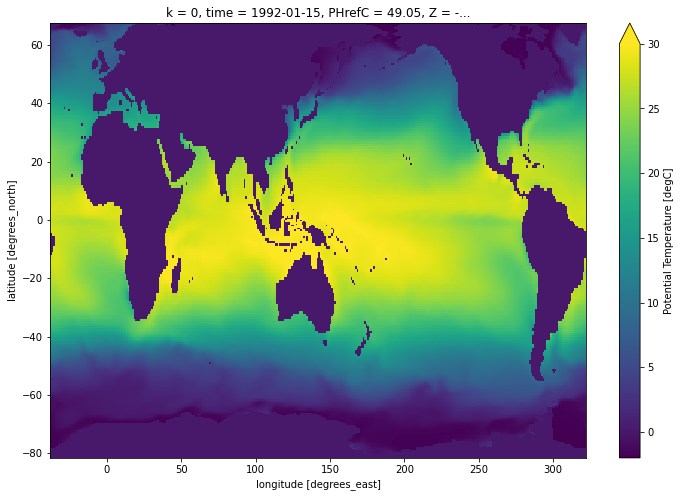

In [190]:
import cartopy.crs as ccrs


ds.THETA[0,0].plot(vmin=-2, vmax=30)

In [12]:
def make_zonal_section(zc):
    scalars = ['SALT', 'THETA'] 
    fluxes = ['ADVy_SLT', 'ADVy_TH', 'VVELMASS']
    ds_sec = ds.sel(
        lon_c=zc['lon'], lon_g=zc['lon']
    ).sel(
        lat_c=zc['lat'], lat_g=zc['lat'], method='nearest'
    )[scalars + fluxes]
    ds_sec.coords['mask'] = ds_sec.hFacC > 0
    return ds_sec

In [20]:
npac_section = {'lon': slice(139, 240), 'lat': 35}
ds_npac = make_zonal_section(npac_section)
ds_npac

<xarray.Dataset>
Dimensions:   (time: 288, Z: 50, lon_c: 101)
Coordinates: (12/23)
    i         (lon_c) int64 177 178 179 180 181 182 ... 272 273 274 275 276 277
    j         int64 207
    j_g       int64 207
    k         (Z) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * time      (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
    Depth     (lon_c) float32 dask.array<chunksize=(3,), meta=np.ndarray>
    ...        ...
    dxG       (lon_c) float32 dask.array<chunksize=(3,), meta=np.ndarray>
  * lon_c     (lon_c) float32 139.5 140.5 141.5 142.5 ... 237.5 238.5 239.5
    lat_c     float32 35.18
    lat_g     float32 34.77
    mask_c    (Z, lon_c) bool dask.array<chunksize=(50, 3), meta=np.ndarray>
    mask_s    (Z, lon_c) bool dask.array<chunksize=(50, 3), meta=np.ndarray>
Data variables:
    SALT      (time, Z, lon_c) float32 dask.array<chunksize=(1, 50, 3), meta=np.ndarray>
    THETA     (time, Z, lon_c) float32 dask.array<chunksize=(1, 50, 3), meta=np.ndarray>
    ADVy_SLT  (time, Z, lon_c) float32 dask.array<chunksize=(1, 50, 3), meta=np.ndarray>
    ADVy_TH   (time, Z, lon_c) float32 dask.array<chunksize=(1, 50, 3), meta=np.ndarray>
    VVELMASS  (time, Z, lon_c) float32 dask.array<chunksize=(1, 50, 3), meta=np.ndarray>

In [21]:
with cluster.get_client():
    ds_npac.load()

In [23]:
ds_npac = ds_npac.where(ds_npac.mask_c)

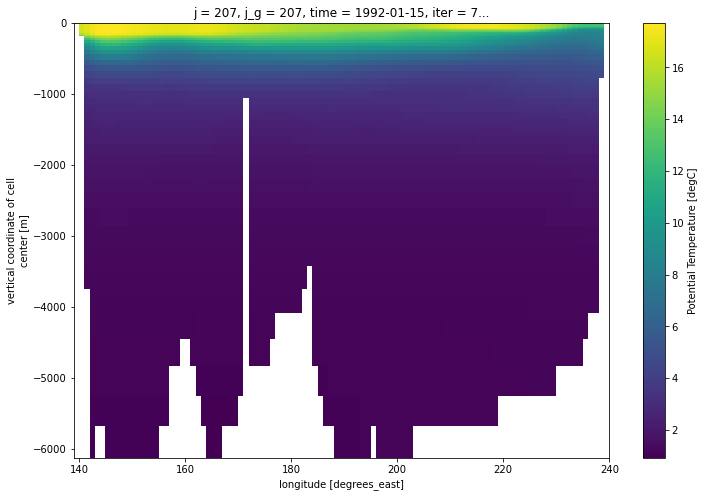

In [24]:
ds_npac.THETA[0].plot()

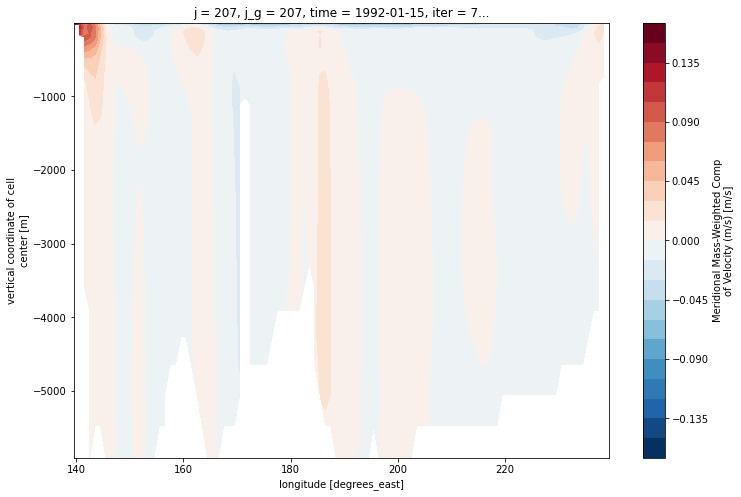

In [28]:
ds_npac.VVELMASS[0].plot.contourf(levels=30)

In [153]:
ds.lon_g.data < ds.lon_g.data[0]

dask.array<lt, shape=(360,), dtype=bool, chunksize=(90,), chunktype=numpy.ndarray>

In [152]:
ds.lon_g.data[ds.lon_g.data < ds.lon_g.data[0]] += 360

ValueError: Boolean index assignment in Dask expects equally shaped arrays.
Example: da1[da2] = da3 where da1.shape == (4,), da2.shape == (4,) and da3.shape == (4,).

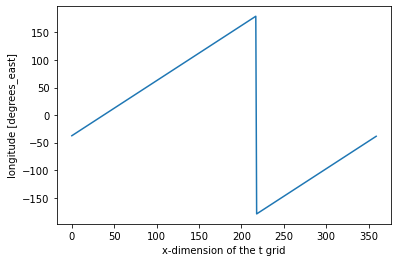

In [147]:
ds.lon_c.plot()

In [148]:
ds.lon_c.load()
ds.lon_c.data[ds.lon_c.data < ds.lon_c.data[0]] += 360

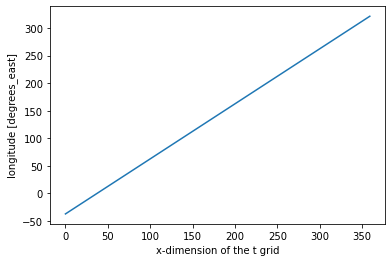

In [149]:
ds.lon_c.plot()

In [150]:
import xgcm
grid = xgcm.Grid(ds, periodic=['X'])
grid

<xgcm.Grid>
T Axis (not periodic, boundary=None):
  * center   time --> inner
  * inner    time_snp --> center
X Axis (periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center

In [36]:
U_bt = (ds.UVELMASS * ds.drF).sum('Z')
with cluster.get_client():
    U_bt.load()

In [38]:
Psi_bt = grid.cumsum(-U_bt * ds.dyG.compute(), 'Y', boundary='fill')
Psi_bt

<xarray.DataArray (time: 288, j_g: 270, i_g: 360)>
array([[[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
         -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
        [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
         -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
        ...,
        [-1.4899795e+08, -1.4901230e+08, -1.4902371e+08, ...,
         -1.4896834e+08, -1.4897357e+08, -1.4898254e+08],
        [-1.4899795e+08, -1.4901230e+08, -1.4902371e+08, ...,
         -1.4896834e+08, -1.4897357e+08, -1.4898254e+08],
        [-1.4899795e+08, -1.4901230e+08, -1.4902371e+08, ...,
         -1.4896834e+08, -1.4897357e+08, -1.4898254e+08]],

       [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
         -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
        [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
         -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
...
        [-1.5350355e+08, -1.5351024e+08, -1.5351501e+08, ...,
         -1.5347536e+08, -1.5348389e+08, -1.5349443e+08],
        [-1.5350355e+08, -1.5351024e+08, -1.5351501e+08, ...,
         -1.5347536e+08, -1.5348389e+08, -1.5349443e+08],
        [-1.5350355e+08, -1.5351024e+08, -1.5351501e+08, ...,
         -1.5347536e+08, -1.5348389e+08, -1.5349443e+08]],

       [[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
         -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
        [-0.0000000e+00, -0.0000000e+00, -0.0000000e+00, ...,
         -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
        ...,
        [-1.4839893e+08, -1.4839482e+08, -1.4838878e+08, ...,
         -1.4840283e+08, -1.4840157e+08, -1.4840077e+08],
        [-1.4839893e+08, -1.4839482e+08, -1.4838878e+08, ...,
         -1.4840283e+08, -1.4840157e+08, -1.4840077e+08],
        [-1.4839893e+08, -1.4839482e+08, -1.4838878e+08, ...,
         -1.4840283e+08, -1.4840157e+08, -1.4840077e+08]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359

In [39]:
mask_Z = grid.interp(ds.hFacS[0].compute(), 'X')

In [40]:
Psi_bt = Psi_bt.where(mask_Z)

In [26]:
cnt = (Psi_bt / 1e6).mean('time').plot.contourf(vmin=-200, vmax=50, levels=30, figsize=(12, 8), line_color='w')


NameError: name 'Psi_bt' is not defined

In [42]:
import hvplot.xarray

In [51]:
(Psi_bt/1e6).hvplot.contourf('i_g', 'j_g', clim=(-150, 50),
                             xlim=(0, 360), ylim=(30, 270),
                             levels=40, cmap='Viridis', height=500, width=800)

:DynamicMap   [time]
   :Polygons   [i_g,j_g]   (value)